# 🔎 Exploratory Data Analysis (EDA_API)
## 📝 Introduction
Exploratory Data Analysis (EDA) is a crucial process in any data-driven project. It helps uncover patterns, relationships, and structures in data, providing valuable insights before moving to modeling and predictive analysis.

In this project, we will explore a dataset that focuses on environmental factors and health outcomes in different countries across various years.

## Dataset Overview:
The dataset contains the following information:

💓 Cardiovascular: Number of cardiovascular disease-related deaths.
🌍 Environmental Factors: Emissions of nitrogen oxide (NOx), sulphur dioxide (SO2), carbon monoxide (CO), black carbon (BC), ammonia (NH3), and non-methane volatile organic compounds (NMVOC).
💸 Economic Indicator: GDP per capita.
⚖️ Health Indicators: Obesity prevalence percentage, diabetes prevalence percentage, and total deaths.
## Data Description
The dataset consists of the following variables:
 
| Feature                              | Variable Type          | Variable                          | Value Type                                     |
|--------------------------------------|------------------------|------------------------------------|------------------------------------------------|
| id                                   | Objective Feature      | id                                | int                                            |
| Country                              | Objective Feature      | country                           | string                                         |
| Code                                 | Objective Feature      | code                              | string                                         |
| Year                                 | Objective Feature      | year                              | int                                            |
| Cardiovascular                       | Target Variable        | cardiovascular                    | int                                            |
| nitrogen_oxide(NOx)                  | Environmental Feature  | nitrogen_oxide                     | float (tonnes)                                 |
| sulphur_dioxide(SO2)                 | Environmental Feature  | sulphur_dioxide                    | float (tonnes)                                 |
| carbon_monoxide(CO)                  | Environmental Feature  | carbon_monoxide                    | float (tonnes)                                 |
| black_carbon(BC)                     | Environmental Feature  | black_carbon                       | float (tonnes)                                 |
| ammonia(NH3)                         | Environmental Feature  | ammonia                            | float (tonnes)                                 |
| non_methane_volatile_organic_compounds| Environmental Feature  | non_methane_volatile_organic_compounds | float (tonnes)                            |
| gdp_per_capita                       | Economic Indicator     | gdp_per_capita                     | float                                          |
| obesity_prevalence_percentage        | Health Indicator       | obesity_prevalence_percentage      | float (%)                                      |
| diabetes_prevalence_percentage       | Health Indicator       | diabetes_prevalence_percentage     | float (%)                                      |
| TotalDeaths                          | Target Variable        | total_deaths                       | int                                            |


## 🎯 Objectives of the EDA
📊 **Understanding Data Distribution:** Examine the distribution of variables such as cardiovascular deaths, emissions, and health indicators to detect outliers, missing values, or unusual patterns.

🌿 **Environmental Impact on Health:** Explore the relationships between cardiovascular deaths and environmental factors (NOx, SO2, CO, etc.) to identify trends and possible causalities.

💸 **Economic and Health Correlations:** Investigate the link between GDP per capita, obesity, diabetes, and total deaths to understand socioeconomic impacts on health.

🔍 **Trends Over Time:** Analyze how cardiovascular diseases, emissions, and health indicators have evolved over time across different countries and regions.

🛠️ **Data Preparation:** Prepare the data by handling missing values, transforming variables as needed, and ensuring it is ready for further analysis and modeling.

## 📥 Data Loading & Librarys


In [1]:
import sys
import os
from dotenv import load_dotenv

load_dotenv()
work_dir = os.getenv('WORK_DIR')


sys.path.append(work_dir)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from math import ceil

In [20]:
df = pd.read_csv('../../data/owid.csv')
df.head()

,Country,Code,Year,CardiovascularDeaths,nitrogen_oxide(NOx),sulphur_dioxide(SO2),carbon_monoxide(CO),black_carbon(BC),ammonia(NH3),non_methane_volatile_organic_compounds,gdp_per_capita,obesity_prevalence_percentage,diabetes_prevalence_percentage,population,TotalDeaths
0,Afghanistan,AFG,1990,44899,425144.75,12876.9610,1013430.94,8362.603,73274.35,404866.40,NaN,1.3,6.6,12045664.0,147971
1,Afghanistan,AFG,1991,45492,413349.72,12671.9840,983752.06,8494.117,77547.38,381666.22,NaN,1.4,6.7,12238879.0,156844
2,Afghanistan,AFG,1992,46557,272757.10,7732.8310,654986.94,8487.974,83017.66,242334.94,NaN,1.5,6.9,13278982.0,169156
3,Afghanistan,AFG,1993,47951,276675.40,7967.0625,662752.90,8756.007,89469.49,240105.75,NaN,1.5,7.1,14943174.0,182230
4,Afghanistan,AFG,1994,49308,252820.98,7698.9930,657333.00,9055.427,95695.22,234383.25,NaN,1.6,7.2,16250799.0,194795


## 📊 Statistical Summary

Univariate analysis.
- To understand all our variables, at first, we should look at their datatypes. We can do it with info() function:

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 6120 non-null   object 
 1   Code                                    6120 non-null   object 
 2   Year                                    6120 non-null   int64  
 3   CardiovascularDeaths                    6120 non-null   int64  
 4   nitrogen_oxide(NOx)                     5880 non-null   float64
 5   sulphur_dioxide(SO2)                    5880 non-null   float64
 6   carbon_monoxide(CO)                     5880 non-null   float64
 7   black_carbon(BC)                        5880 non-null   float64
 8   ammonia(NH3)                            5880 non-null   float64
 9   non_methane_volatile_organic_compounds  5880 non-null   float64
 10  gdp_per_capita                          5103 non-null   floa

***General Structure***

- **Entries**: 6,120 records.
- **Columns**: 15 attributes capturing various metrics.

***Columns and Data Types***

1. **Country**: Name of the country (type `object`).
2. **Code**: Country code (type `object`).
3. **Year**: Year of the data (type `int64`).
4. **CardiovascularDeaths**: Count of deaths from cardiovascular diseases (type `int64`).
5. **TotalDeaths**: Total count of deaths (type `int64`).

***Air Quality Metrics***
- **nitrogen_oxide (NOx)**: Data on nitrogen oxides (type `float64`, with missing values).
- **sulphur_dioxide (SO2)**: Data on sulfur dioxide (type `float64`, with missing values).
- **carbon_monoxide (CO)**: Data on carbon monoxide (type `float64`, with missing values).
- **black_carbon (BC)**: Data on black carbon (type `float64`, with missing values).
- **ammonia (NH3)**: Data on ammonia (type `float64`, with missing values).
- **non_methane_volatile_organic_compounds**: Data on non-methane volatile organic compounds (type `float64`, with missing values).

***Economic and Health Metrics***
- **gdp_per_capita**: Gross Domestic Product per capita (type `float64`, with missing values).
- **obesity_prevalence_percentage**: Percentage of obesity prevalence (type `float64`, with missing values).
- **diabetes_prevalence_percentage**: Percentage of diabetes prevalence (type `float64`, with missing values).
- **population**: Population size (type `float64`, with missing values).


### 📝 Data Summary and Null Values Analysis

In this section, we generate a summary of the dataset to analyze its structure, including data types, null values, duplicate entries, and the number of unique values for each column. The following code creates a DataFrame to summarize this information:


In [23]:
summary = pd.DataFrame({
    'dtypes': df.dtypes,
    'null count': df.isnull().sum(),
    'duplicate count': df.duplicated().sum(),
    'unique values': df.nunique()
})
summary.T

,Country,Code,Year,CardiovascularDeaths,nitrogen_oxide(NOx),sulphur_dioxide(SO2),carbon_monoxide(CO),black_carbon(BC),ammonia(NH3),non_methane_volatile_organic_compounds,gdp_per_capita,obesity_prevalence_percentage,diabetes_prevalence_percentage,population,TotalDeaths
dtypes,object,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
null count,0,0,0,0,240,240,240,240,240,240,1017,1044,1420,60,0
duplicate count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
unique values,204,204,30,5225,5851,5846,5846,5821,5850,5851,5103,491,245,6047,5725



This explanation summarizes the code and provides insights into the null values, duplicate counts, and unique values in the dataset.


## 🔍 Data imputation

The code snippet performs data cleaning by addressing missing values in the dataset. Specifically, it fills in the missing values for columns related to environmental and health indicators, except for certain categorical columns like `Country`, `Code`, and `Year`.

In [24]:
for col in df.columns:
    if col not in ['id', 'Country', 'Code', 'Year']:  
        df[col] = df.groupby('Year')[col].transform(lambda x: x.fillna(x.median()) if x.notna().sum() > 0 else x) #besity_prevalence_percentage & diabetes_prevalence_percentage just have information until 2016

### 📊 Statistic counts

In [25]:
def statistic_count(num):

    statistic = num.describe().T
    statistic['median'] = num.median()
    statistic = statistic.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(statistic)

In [26]:
numerical = df.select_dtypes('number').iloc[:, 1:]

statistic_count(numerical)

,count,mean,median,std,min,25%,50%,75%,max
CardiovascularDeaths,6120.0,7.316045e+04,1.174200e+04,2.915775e+05,4.00000,2.028000e+03,1.174200e+04,4.254650e+04,4.584273e+06
nitrogen_oxide(NOx),6120.0,4.947497e+05,6.425998e+04,2.031665e+06,0.00000,1.687757e+04,6.425998e+04,2.328210e+05,3.071117e+07
sulphur_dioxide(SO2),6120.0,4.894949e+05,3.332995e+04,2.136664e+06,0.00000,5.442894e+03,3.332995e+04,1.874847e+05,3.778001e+07
carbon_monoxide(CO),6120.0,2.638750e+06,3.746415e+05,1.456791e+07,0.00000,1.103479e+05,3.746415e+05,1.121007e+06,2.152620e+08
black_carbon(BC),6120.0,2.804690e+04,5.438860e+03,1.228942e+05,0.00000,1.545979e+03,5.438860e+03,1.889261e+04,1.921052e+06
ammonia(NH3),6120.0,2.657135e+05,4.922469e+04,1.043341e+06,0.00000,1.038587e+04,4.922469e+04,1.372262e+05,1.256013e+07
non_methane_volatile_organic_compounds,6120.0,6.255125e+05,1.233610e+05,2.256737e+06,0.00000,3.488575e+04,1.233610e+05,3.975936e+05,3.094647e+07
gdp_per_capita,6120.0,1.492863e+04,9.084523e+03,1.734637e+04,246.74171,4.092612e+03,9.084523e+03,1.792202e+04,1.692003e+05
obesity_prevalence_percentage,5508.0,1.487173e+01,1.455000e+01,9.836626e+00,0.30000,6.800000e+00,1.455000e+01,1.990000e+01,6.100000e+01
diabetes_prevalence_percentage,5100.0,7.845922e+00,6.900000e+00,3.803865e+00,1.90000,5.700000e+00,6.900000e+00,8.625000e+00,2.980000e+01


1. **Year**
The data covers a period from 1990 to 2019, with a symmetric distribution (mean and median both 2004.5), suggesting consistency over time with no significant outliers.

2. **Cardiovascular Deaths**
There is a high level of positive skewness, with a mean of 73,160 deaths but a much lower median (11,742). The standard deviation is very high, indicating that a few countries have extremely high cardiovascular death rates (up to 4.5 million), while most have much lower numbers.

3. **Nitrogen_oxide (NOx)**
Emissions show a large positive skew, with some countries contributing disproportionately high emissions (up to 30 million tons). The variability is significant, as shown by the standard deviation of over 2 million tons.

4. **Sulphur_dioxide (SO2)**
Similar to NOx, SO2 emissions are highly skewed, with a few countries emitting very high amounts (up to 37 million tons), while the majority of countries emit far less.

5. **Carbon_monoxide (CO)**
The mean (2.6 million tons) is much higher than the median (374,641 tons), indicating a highly skewed distribution. Some countries emit up to 215 million tons, suggesting significant outliers in emissions data.

6. **GDP_per_capita**
There is considerable variation in wealth across countries. The mean GDP per capita is 14,928 USD, but the median is much lower at 9,084 USD, showing that a few wealthy countries skew the data, while most countries are significantly below the mean.

7. **Obesity_prevalence_percentage**
The distribution of obesity rates is fairly symmetrical, with a mean of 14.87% and a median of 14.55%. While most countries cluster around the median, some have very high rates (up to 61%).

8. **TotalDeaths**
There is a large disparity in total death counts, with a mean of 239,891 deaths but a much lower median (50,257). Some countries experience much higher death tolls (up to 10 million), contributing to significant skewness in the data.

## 📊 Data Distribution

Most of the records seem to contain many outliers, where some values appear to be significantly larger than the majority of the data points.

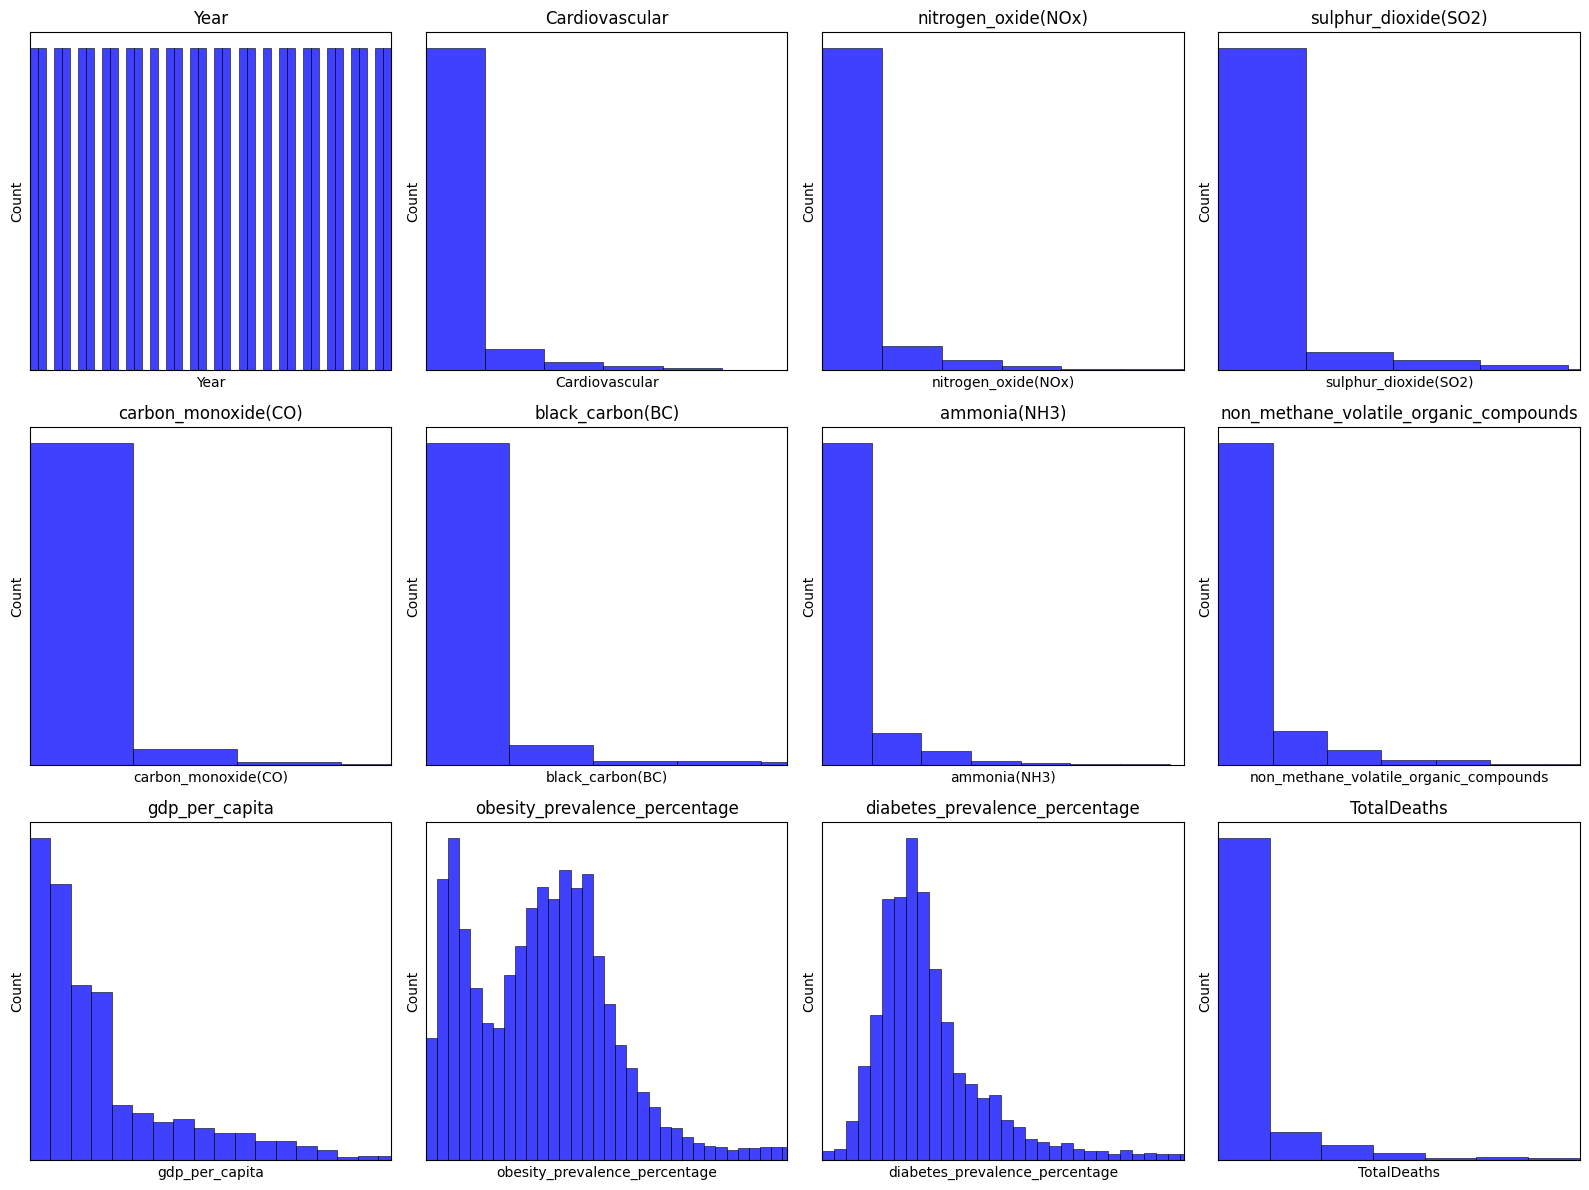

In [19]:
n_cols = 4
n_rows = ceil(numerical.shape[1] / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 4, n_rows * 4))

axes = axes.flatten()

for i, column in enumerate(numerical.columns):
    sns.histplot(numerical[column], bins=45, ax=axes[i], color='blue', kde=False)
    axes[i].set_title(column)
    axes[i].set_yticks([])  
    axes[i].set_xticks([])  

    axes[i].set_xlim([numerical[column].min(), numerical[column].quantile(0.98)])

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


**Year:** The data is uniformly distributed over the years, indicating that it was collected within a consistent time range.

**Cardiovascular:** Most of the data related to cardiovascular diseases is concentrated at low values, with only a few high values.

**Nitrogen oxide (NOx) and Sulphur dioxide (SO2):** Both pollutants have a left-skewed distribution, indicating that most values are low, with only a few cases of high levels.

**Carbon monoxide (CO) and Black carbon (BC):** Most values for these pollutants are near zero, with very few elevated values.

**Ammonia (NH3) and Non-methane volatile organic compounds:** The distribution of these compounds follows a similar pattern to other pollutants, with concentrations at low values.

**GDP per capita:** The distribution is right-skewed, with a higher frequency in the lower ranges of GDP per capita, decreasing as GDP increases.

**Obesity prevalence percentage and Diabetes prevalence percentage:** Both distributions show a more dispersed and symmetric pattern, with more cases in the middle range. Obesity seems to have a higher frequency at slightly higher values than diabetes.

**Total deaths:** The distribution is skewed to the left, indicating that most of the total death data is in the lower ranges.

## 📊 Data Correlation

A correlation matrix has been created. A column for GDP has been added, which is calculated by multiplying the population by GDP per capita.


In [27]:
df['gdp'] = df['gdp_per_capita']*df['population']
df.insert(11, 'gdp', df.pop('gdp'))

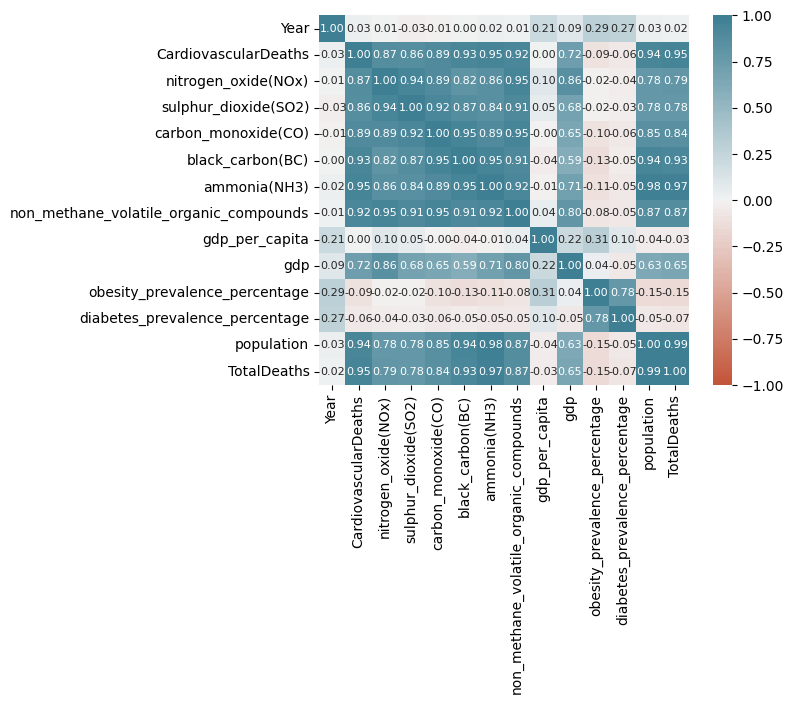

In [28]:
correlation= df.select_dtypes(include=[float, int]).corr()

ax = sns.heatmap(
    correlation,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt='.2f',
    annot_kws={"size": 8}
)

**CardiovascularDeaths**

- There is a **high positive correlation** with pollutants such as **nitrogen oxide (NOx)** (0.87), **sulphur dioxide (SO2)** (0.86), **black carbon (BC)** (0.82), **carbon monoxide (CO)** (0.89), **ammonia (NH3)** (0.95), and **non-methane volatile organic compounds (NMVOC)** (0.92). This suggests that as these pollutants increase, so do **cardiovascular deaths**.

**Air Pollutants (NOx, SO2, CO, BC, NH3, and NMVOC)**

- These pollutants are **strongly correlated** with each other (values between 0.82 and 0.95). This indicates that these pollutants tend to occur together in the air. They are also positively correlated with **population** and **TotalDeaths** (values beetween 0.86 and 0.95), which may indicate an increase in pollutant emissions in areas with higher population density or higher mortality rates.

**gdp_per_capita**

- There is a **correlation of 0.21** with the year, indicating a **slight positive relationship** between the growth of **GDP per capita** over time. This suggests **gradual economic growth**.

- The correlation with **obesity (0.31)** and **diabetes (0.10)** is **positive**, though stronger with obesity. This could indicate that higher **GDP per capita** is associated with an increase in **obesity prevalence**, while the relationship with diabetes is weaker.

- Otherwise, it shows a **very low** or near-zero correlation with most other variables. This suggests that **GDP per capita** is not directly related to pollution levels or cardiovascular deaths, at least in this sample.

**gdp**

- The correlation analysis involving **GDP** indicates its significant relationships with various health and environmental indicators. Notably, GDP demonstrates a **moderate positive correlation** with **cardiovascular deaths** and **air pollutants**. As GDP increases, these health issues may also rise.


**Obesity_prevalence_percentage and diabetes_prevalence_percentage**

- The correlation between these two is quite high **(0.78)**, reflecting a **strong association** between obesity and diabetes prevalence, which is expected since obesity is a **risk factor** for type 2 diabetes.

- Obesity and diabetes have correlations of **0.29 and 0.27** respectively with the year, suggesting a **moderate increase** in obesity and diabetes over time.

- Otherwise, they show **negative correlations** with most variables, especially with pollutants and cardiovascular deaths, which could be unexpected; however, this may depend on other factors not present in the analysis.

**Population and TotalDeaths**

- They have a **very high correlation** (0.99), suggesting that areas with **higher population density** record **more deaths**. Both have a **high positive correlation** with most pollutants ranging from 0.78 to 0.98. This suggests that in areas with more population, there are higher levels of pollution and consequently more deaths.


## 📊 Data Visualization

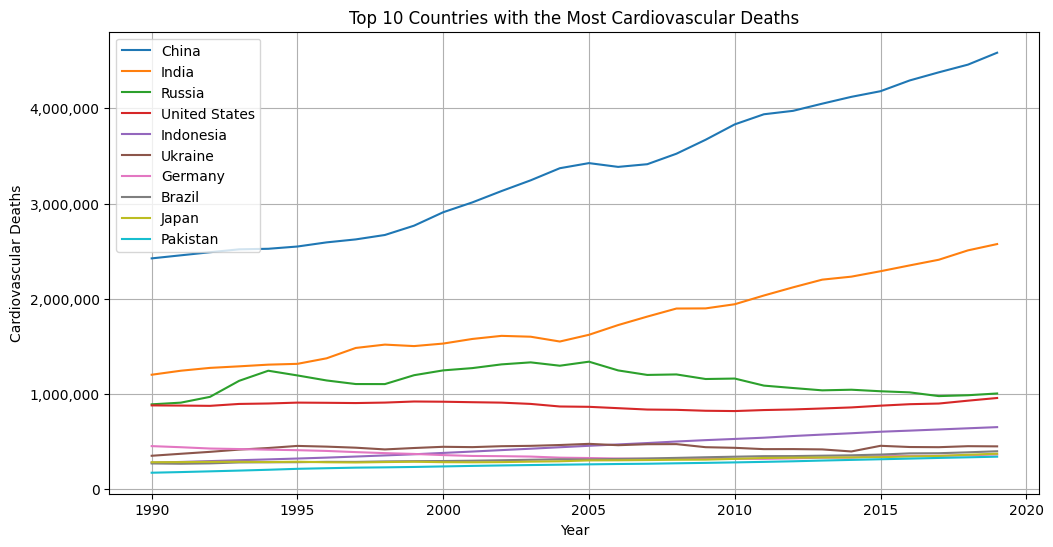

In [35]:
import matplotlib.ticker as mticker

top_countries = df.groupby('Country')['CardiovascularDeaths'].sum().nlargest(10).index
top_df = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
for country in top_countries:
    country_data = top_df[top_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['CardiovascularDeaths'], label=country)

plt.title('Top 10 Countries with the Most Cardiovascular Deaths')
plt.xlabel('Year')
plt.ylabel('Cardiovascular Deaths')
plt.legend()

plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.grid(True)
plt.show()

- The graph shows that **China, India, Russia,** and the **United States** are the countries with the highest cardiovascular deaths. The large populations in these countries significantly influence the mortality figures.
  
- **China** has seen a remarkable increase over the years, with deaths rising from approximately **2,400,000** in **1990** to nearly **4,500,000** in **2019**.

- **India** also experienced growth, rising from about **1,200,000** to **2,700,000** during the same period.

- **Russia** had an initial increase but now remains stable at around **1,000,000** cardiovascular deaths per year.

- The **United States** has also remained steady, increasing from **800,000** to nearly **1,000,000** cases per year.

- The increase in cardiovascular deaths in **China** and **India** can be attributed to several factors. Addressing the underlying health issues and implementing preventive measures in these countries could be crucial in reducing these alarming figures.


This graph shows the evolution of **cardiovascular deaths per 100,000 people** in the **10 countries with the highest mortality** from 1990 to 2020.

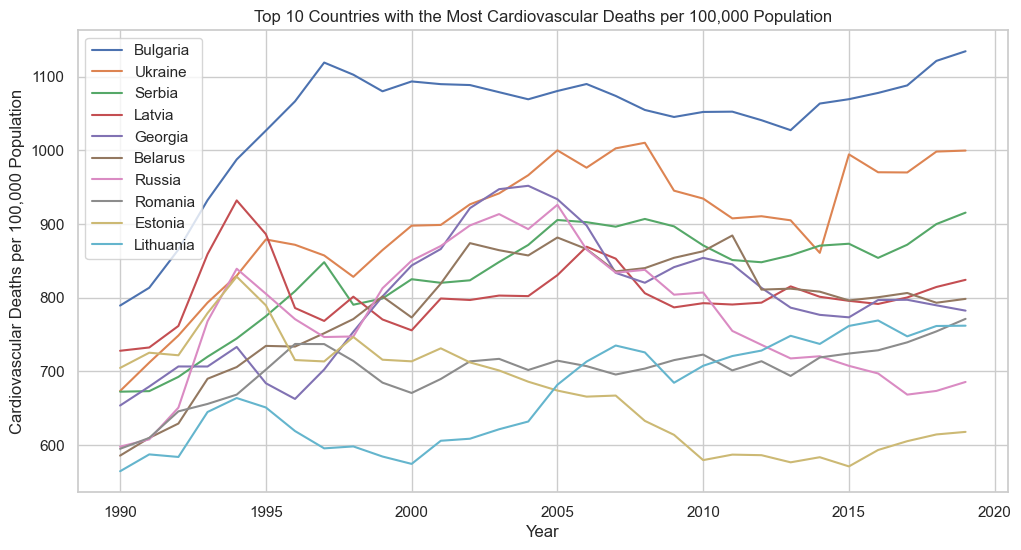

In [90]:
df['DeathRate'] = (df['CardiovascularDeaths'] / df['population']) * 100000

top_countries = df.groupby('Country')['DeathRate'].sum().nlargest(10).index
top_df = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
for country in top_countries:
    country_data = top_df[top_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['DeathRate'], label=country)

plt.title('Top 10 Countries with the Most Cardiovascular Deaths per 100,000 Population')
plt.xlabel('Year')
plt.ylabel('Cardiovascular Deaths per 100,000 Population')
plt.legend()
plt.grid(True)
plt.show()

- **Bulgaria** remains in **first place**, with significantly higher rates than other countries, reaching over **1,100 deaths per 100,000 people** by 2020.

- **Ukraine and Serbia** show trends that reflect **constant increases** after periods of decline in the early 2000s.

- Most countries have experienced several **fluctuations** between 1990 and 2020, with slight **reductions or increases** during some periods. Some countries show a **gradual increase** in cardiovascular deaths.

- These countries are mostly from **Europe**, highlighting the **need for public health interventions** focused on the prevention and treatment of cardiovascular diseases in these countries.


The following graph was created using data from the year **2019** only to focus on a recent benchmark and avoid the temporal variability that could bias the results.

The graph presents a series of scatter plots comparing the **tons emitted of different air pollutants (NOx, SO2, CO, BC, NH3, and NMVOC)** on the x-axis against the **average cardiovascular deaths** on the y-axis.

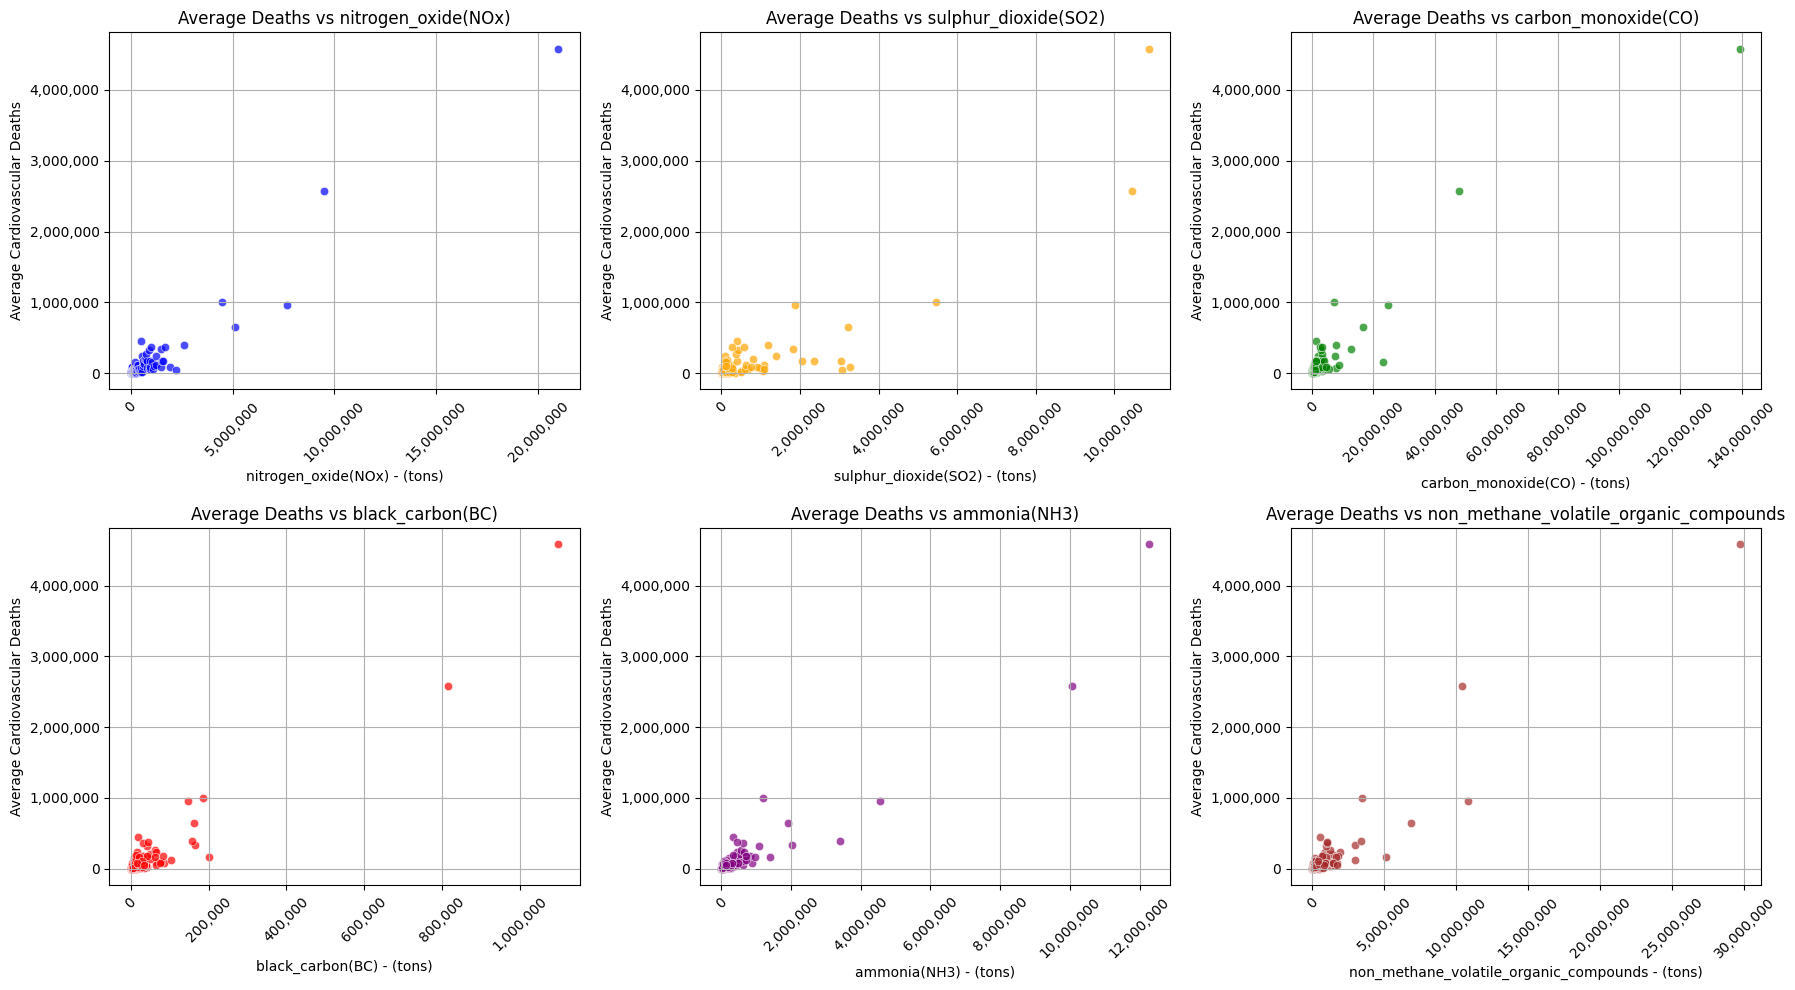

In [39]:
from matplotlib.ticker import FuncFormatter

pollutants = [
    'nitrogen_oxide(NOx)',
    'sulphur_dioxide(SO2)',
    'carbon_monoxide(CO)',
    'black_carbon(BC)',
    'ammonia(NH3)',
    'non_methane_volatile_organic_compounds'
]

def comma_format(x, pos):
    return f'{int(x):,}'

df_2019 = df[df['Year']== 2019]
average_deaths = df_2019.groupby(pollutants)['CardiovascularDeaths'].mean().reset_index()
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, (pollutant, color) in enumerate(zip(pollutants, colors)):
    sns.scatterplot(data=average_deaths, x=pollutant, y='CardiovascularDeaths', alpha=0.7, color=color, ax=axes[i])
    axes[i].set_title(f'Average Deaths vs {pollutant}')
    axes[i].set_xlabel(f'{pollutant} - (tons)')
    axes[i].set_ylabel('Average Cardiovascular Deaths')
    axes[i].grid()

    axes[i].yaxis.set_major_formatter(FuncFormatter(comma_format))
    axes[i].xaxis.set_major_formatter(FuncFormatter(comma_format))

    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- **The high positive correlation** we discussed earlier in the correlation matrix between pollutants and cardiovascular deaths is evidenced in the graph through the **upward pattern**: as pollutant emissions increase (x-axis), average cardiovascular deaths (y-axis) also tend to rise.

- Since **the pollutants are correlated**, it is not surprising that they exhibit similar patterns.

- Although the **major concentration of points** is at low emission levels, the scattered points showing high emission values tend to align with a **proportional increase in deaths**.

- Some **outliers** can be observed, indicating that when emissions are very high, cardiovascular deaths also increase significantly.

- This analysis highlights the **importance of mitigating emissions** to reduce deaths related to cardiovascular diseases.

For the same reason as the previous graph, data from **2019** has been used.

This graph shows the relationship between **tons emitted of air pollutants (NOx, SO2, CO, BC, NH3, and NMVOC)** on the x-axis and the **average GDP (Gross Domestic Product)** on the y-axis.


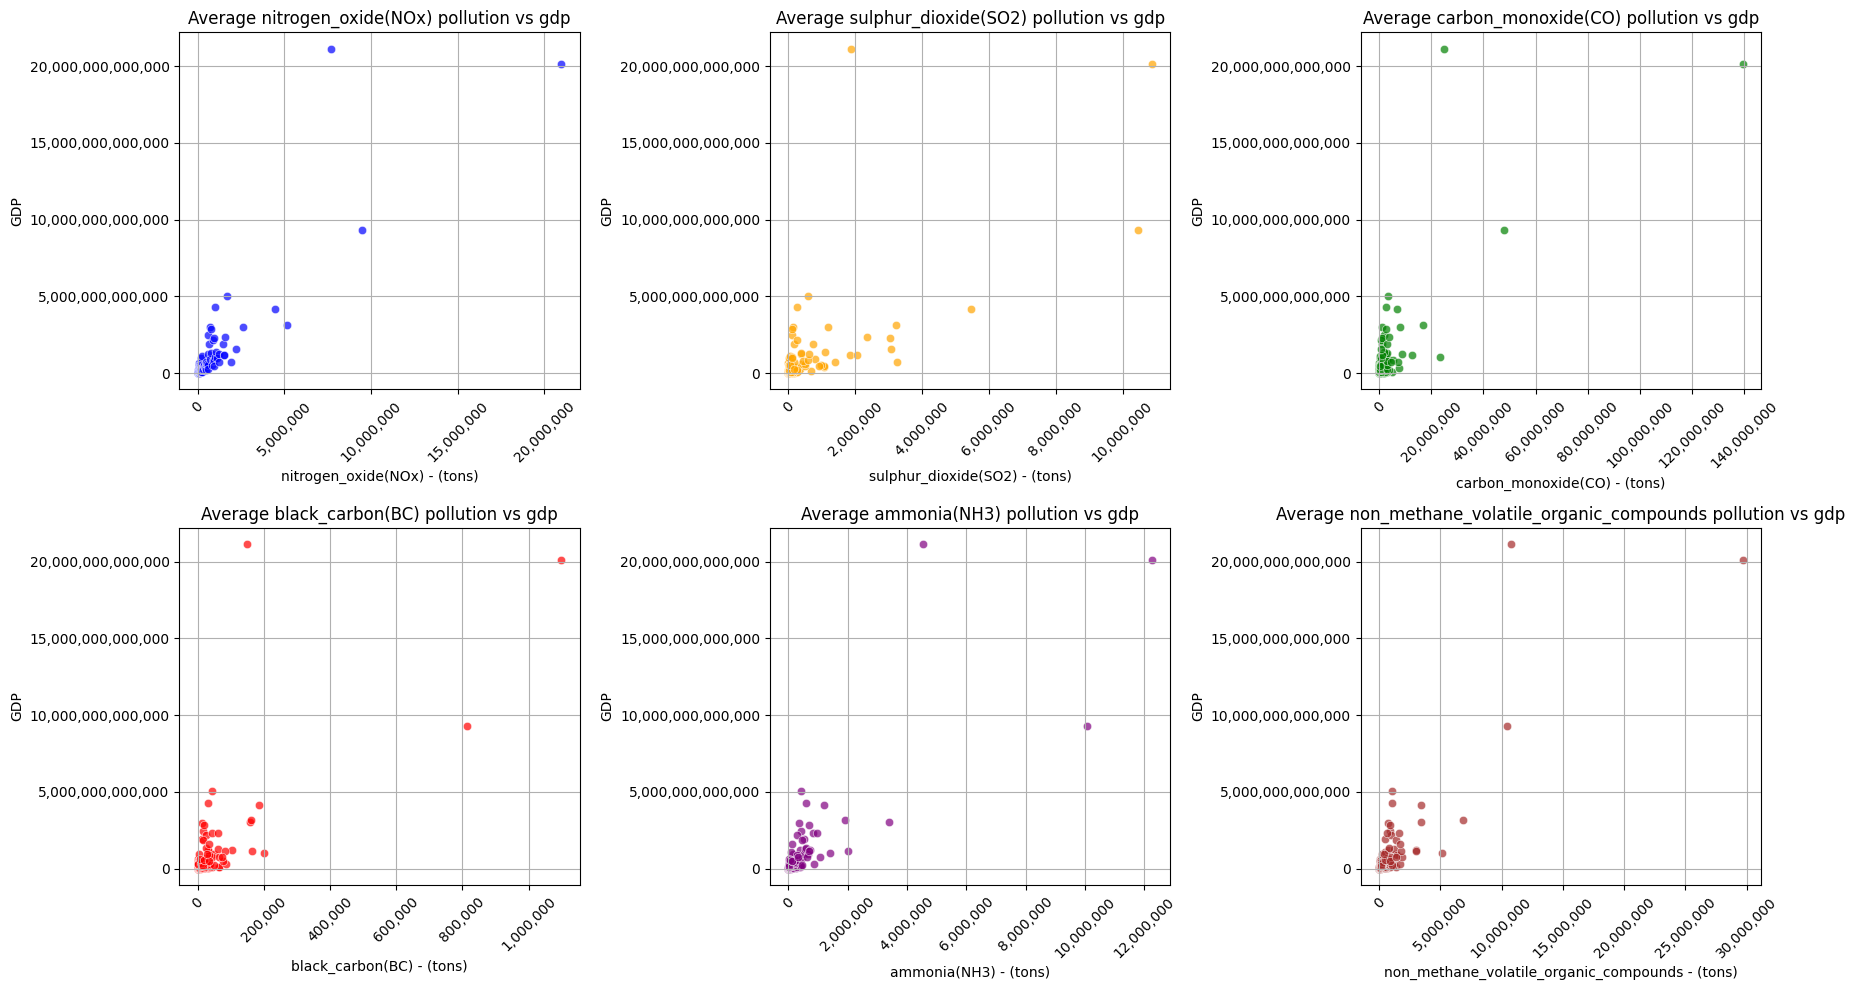

In [34]:
from matplotlib.ticker import FuncFormatter

pollutants = [
    'nitrogen_oxide(NOx)',
    'sulphur_dioxide(SO2)',
    'carbon_monoxide(CO)',
    'black_carbon(BC)',
    'ammonia(NH3)',
    'non_methane_volatile_organic_compounds'
]

def comma_format(x, pos):
    return f'{int(x):,}'


df_2019 = df[df['Year']== 2019]
average_cvd_per_gdp = df_2019.groupby(pollutants)['gdp'].mean().reset_index()

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, (pollutant, color) in enumerate(zip(pollutants, colors)):
    sns.scatterplot(data=average_cvd_per_gdp, x=pollutant, y='gdp', alpha=0.7, color=color, ax=axes[i])
    axes[i].set_title(f'Average {pollutant} pollution vs gdp')
    axes[i].set_xlabel(f'{pollutant} - (tons)')
    axes[i].set_ylabel('GDP')
    axes[i].grid()

    axes[i].yaxis.set_major_formatter(FuncFormatter(comma_format))
    axes[i].xaxis.set_major_formatter(FuncFormatter(comma_format))
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- The graph shows that, in general, there is a **positive relationship** between GDP and pollutant emissions, but it is **not linear or absolute**. This moderate correlation reflects that larger economies tend to have higher emissions, but with **significant variations** depending on the countries and their policies.

- This is consistent with the results of the **correlation matrix**, where as GDP increases, emissions also rise, but **with some moderation**.


The following graph shows the trend of **concentration of different air pollutants** in the **10 top emitting countries** between **1990** and **2020**.

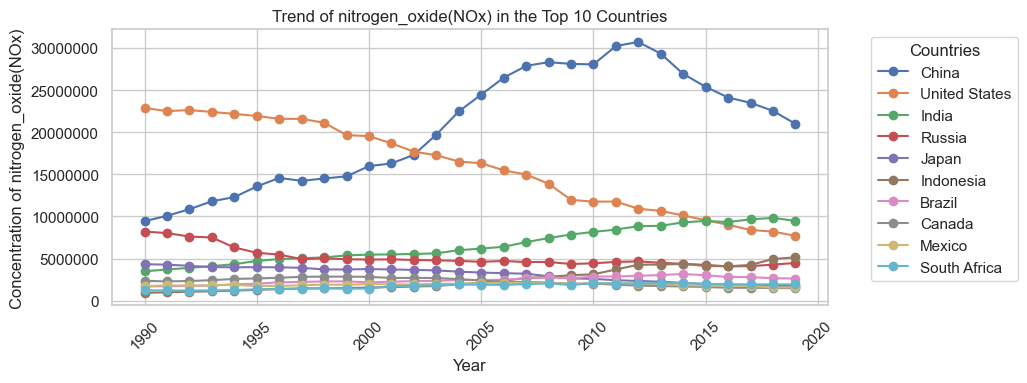

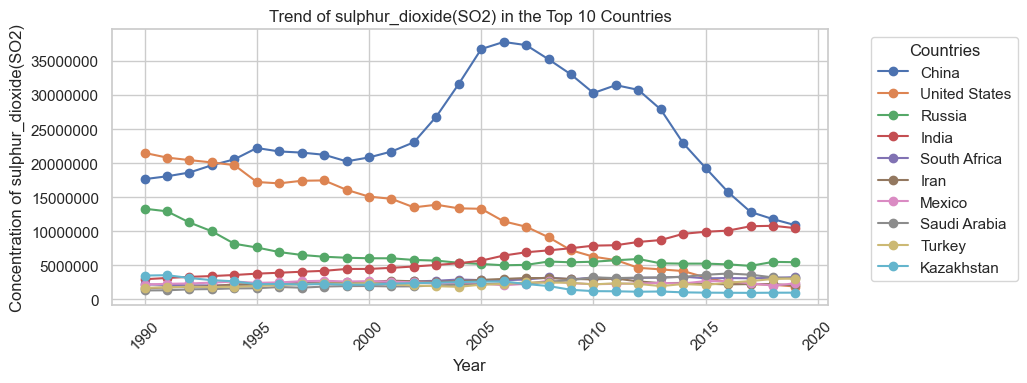

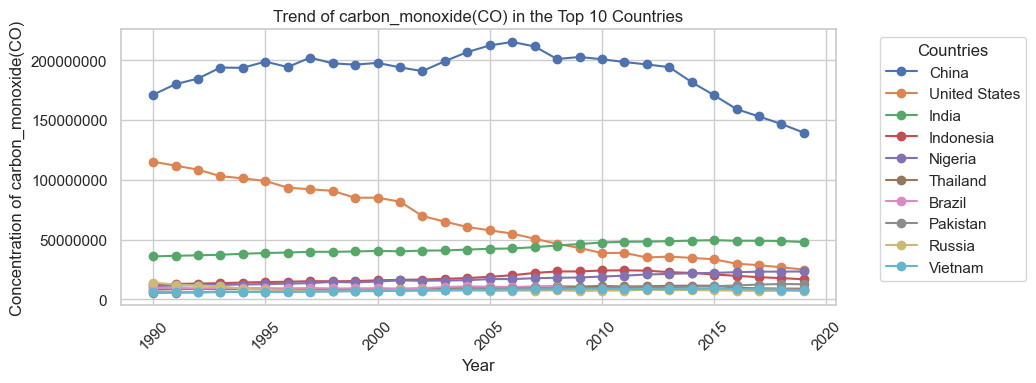

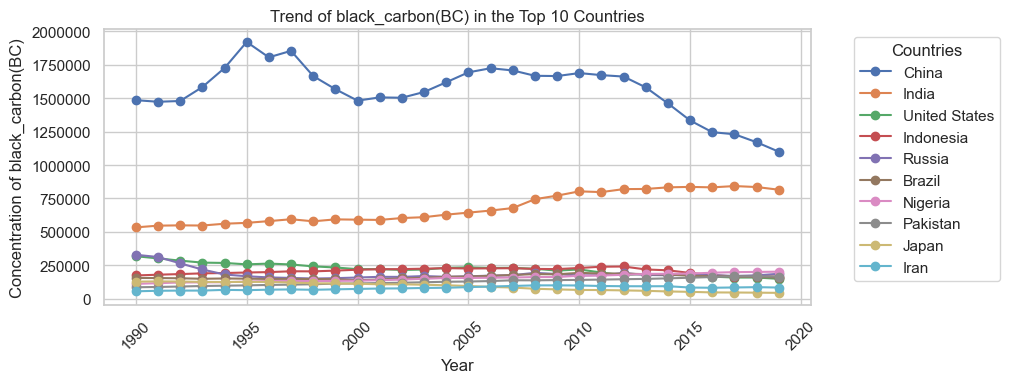

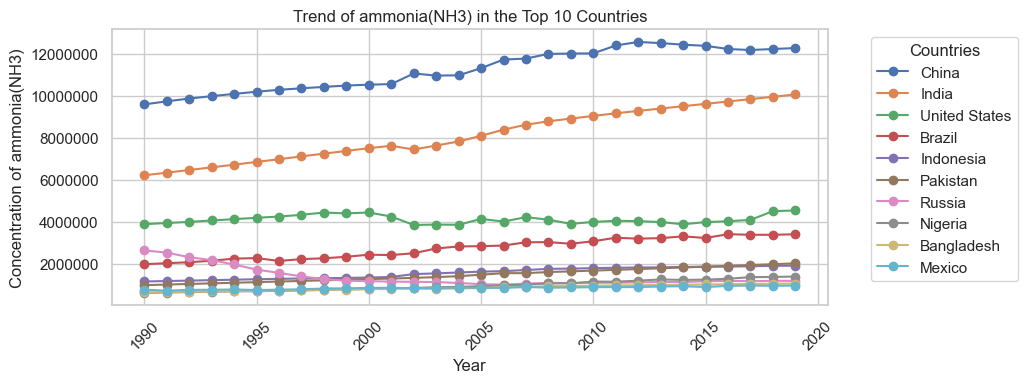

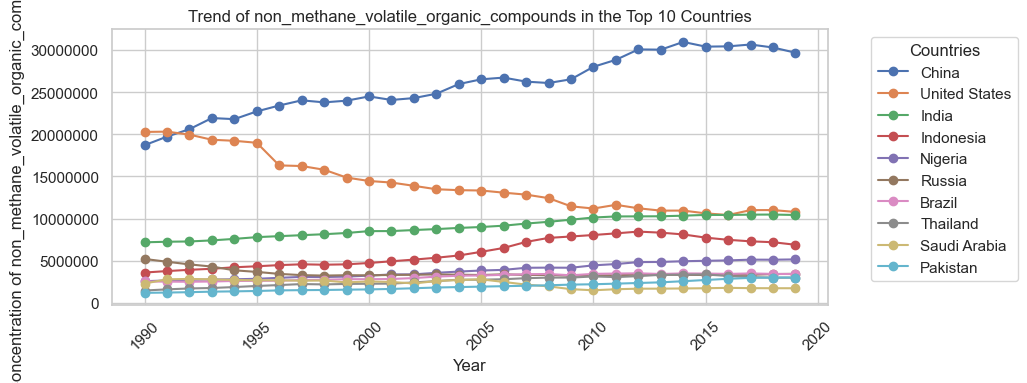

In [82]:
contaminants = [
    'nitrogen_oxide(NOx)',
    'sulphur_dioxide(SO2)',
    'carbon_monoxide(CO)',
    'black_carbon(BC)',
    'ammonia(NH3)',
    'non_methane_volatile_organic_compounds'
]

for contaminant in contaminants:
    top_10_countries = df.groupby('Country')[contaminant].mean().nlargest(10).index.tolist()
    
    df_top_10 = df[df['Country'].isin(top_10_countries)]
    
    plt.figure(figsize=(10,4))
    
    for country in top_10_countries:
        country_data = df_top_10[df_top_10['Country'] == country]
        plt.plot(country_data['Year'], country_data[contaminant], marker='o', label=country)
    
    plt.title(f'Trend of {contaminant} in the Top 10 Countries')
    plt.xlabel('Year')
    plt.ylabel(f'Concentration of {contaminant}')
    plt.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.gca().yaxis.get_major_formatter().set_scientific(False)
    plt.show()

- **In each graph**, China is consistently the country with the **highest emissions** in almost all pollutants, especially in **NOx, SO2, BC, and CO**. However, there have been **significant reductions** starting in 2010 in several of them, such as NOx, SO2, CO, and BC.

- **The United States** has shown a **constant decreasing trend** in all pollutants, except for **Black carbon (BC)** and **ammonia (NH3)** emissions, which have remained relatively stable.

- **India** exhibits a **continuous increase** in emissions of NOx, BC, NH3, and other pollutants.

- **Other emerging countries** (Brazil, Russia, Indonesia) have maintained moderate emission levels compared to China, the U.S., and India, although with a **growing trend** in some pollutants, such as NOx and NMVOC.

- Emissions of **sulfur dioxide (SO2)** show a **marked reduction**, especially in China and the United States, which may be a result of **successful regulations** on air quality aimed at reducing this pollutant.

- These graphs reflect how **industrialization**, **economic growth**, and **environmental policies** directly impact air pollution levels in each country. Trends suggest that if stricter policies are not implemented, emissions could continue to rise in emerging economies.
